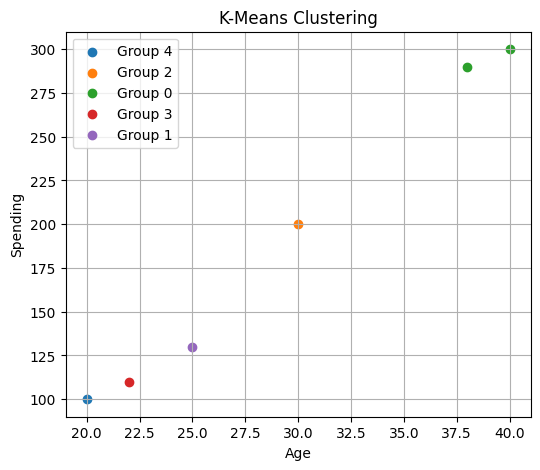

  Customer  Age  Spending  Group
0     Riya   20       100      4
1     Aman   30       200      2
2   Faizan   40       300      0
3     Neha   22       110      3
4    Imran   38       290      0
5    Sneha   25       130      1


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

data = {
    'Customer' : ['Riya','Aman','Faizan','Neha','Imran' , 'Sneha'],
    'Age' : [20,30,40,22,38,25],
    'Spending' : [100,200,300,110,290,130]
}

df = pd.DataFrame(data)
X = df[['Age', 'Spending']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
model = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Group'] = model.fit_predict(X)
plt.figure(figsize=(6,5))
for group in df['Group'].unique():
    clustered_data = df[df['Group'] == group]   #masking
    plt.scatter(clustered_data['Age'], clustered_data['Spending'], label=f'Group {group}')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(df)

Variance Explained by each Principal Component:
[99.45  0.4 ]


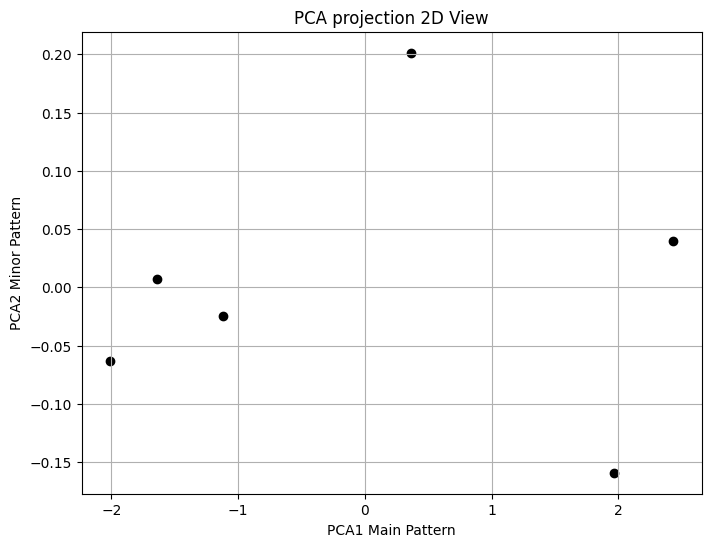

new dataframe after PCA:
       PCA1      PCA2
0 -2.011139 -0.063692
1  0.363151  0.201410
2  2.433588  0.039336
3 -1.637152  0.006703
4  1.968445 -0.159213
5 -1.116893 -0.024544


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'Age' : [20,30,40,22,38,25],
    'Income' : [30000,60000,80000,35000,72000,40000],
    'Spending' : [1000,2000,3000,1100,2900,1300]
}

df = pd.DataFrame(data)

# Data Preprocessing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

explained_variance = pca.explained_variance_ratio_
print("Variance Explained by each Principal Component:")
print(np.round(explained_variance * 100, 2))    #in percentage

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], color = 'black')
plt.title('PCA projection 2D View')
plt.xlabel('PCA1 Main Pattern')
plt.ylabel('PCA2 Minor Pattern')
plt.grid(True)
plt.show()

print("new dataframe after PCA:")
print(pca_df)   